# Regression with simple Gradient Descent

# TOC

* [Simple toy data simulation](#sds123453)
* [Simplest Linear ML model ](#sl_ML_m)
* [Update parameter formula](#upf)
* [Implementation](#i1234)
* [Results](#r123)
* [Further ideas](#fi13)

In [1]:
%pwd

'C:\\Users\\anton\\Documents\\programming\\python\\ML\\Basics'

*Main Idea:*
<div class="alert alert-block alert-success" style="text-align: justify"> 
We will simulate a simple regression as a first simple machine learning idea about regression, when a machine learning algorithm tries to learn a pattern from data and fit its parameters (linear coefficient and an angular slope) to minimize an error, like mean squared error (MSE)
</div>

[1] https://en.wikipedia.org/wiki/Mean_squared_error <br>
[2] https://en.wikipedia.org/wiki/Gradient_descent  <br>
[3] https://www.teachy.app/en/book/high-school/10th-grade/mathematics-en/first-degree-function-concepts-and-applications-2055b <br>
[4] https://stackoverflow.com/questions/42920602/calling-a-lambda-with-a-numpy-array <br>
[5] https://matplotlib.org/stable/tutorials/pyplot.html <br>
[6] https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

### Simple toy data simulation <a class="anchor" id="sds123453"></a>

We will simulate a simples linear data with some random white noise

In [1]:
import numpy as np

In [2]:
# Data size population
n=100
xi=0.0; xf=10.;
dx= (xf-xi)/n
x = np.arange(0.,10.,dx) 
a= 2.   # 'a',angular coefficient, indicates the slope of this line
b = 1.5 #  'b', the linear coefficient, indicates the point where the line intersects the y-axis

y = x * a # mutiplying x values by a coeff

# To sum function y by b coeff [4]

sum_ele = lambda u,w: u + w 
y = sum_ele(y,b)



In [3]:
len(x),len(y)

(100, 100)

In [4]:
print(y[:10]) # printing some values
print(y[-10:]) # last values

[1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3]
[19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3]


Plotting data

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.rcParams["figure.figsize"] = (6,4) #[6] configure figure size

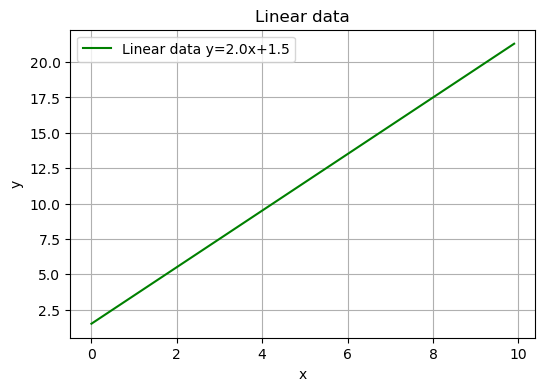

In [7]:
# displaying the title
plt.title("Linear data")
plt.plot(x,y, color='green',label='Linear data y='+str(a)+'x+'+str(b))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

Including some noise ($\epsilon$),for a bit more 'real' data.

In [8]:
# Set the seed, it will generate the same random value to compare forward values
np.random.seed(0)
e = np.random.uniform(-1.,1.,n)

In [9]:
y_e = sum_ele(y,e) # To sum the noise to linear previous data

In [10]:
y[-1],e[-1],y_e[-1] # just check

(21.3, -0.9906090476149059, 20.309390952385094)

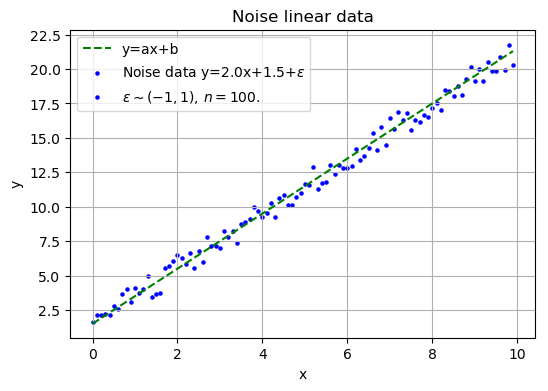

In [11]:
# displaying the title
plt.title("Noise linear data")
plt.plot(x,y, color='green',label='y=ax+b', linestyle='dashed')
plt.scatter(x,y_e, color='blue',s=5,label='Noise data y='+str(a)+'x+'+str(b)+'+$\epsilon$')
plt.scatter([],[], color='blue',s=5,label='$\epsilon\sim(-1,1) , \, n=$'+str(n)+'.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Simplest linear ML model  <a class="anchor" id="sl_ML_m"></a>  

Now let's implement your regression machine learning model

  To adjust a linear, simplest first order model $y^R= \theta_0 x + \theta_1$ with parameters $\theta_0, \theta_1$ (angular and linear coefficients, respectively). To fit $y_R$ to data $y$ we need to adjust $\theta_0, \theta_1$, how to do that? In machine learning and statistics we need to think about how to measure an error related to the discrepancy between regression functions fit to the data. The error function can be called as a loss function, and in your case it can be a mean squared error (MSE)[2] or mean squared deviation (MSD), or a mean distance between data and the regression function ($y_R$)  


### Update parameter formula  <a class="anchor" id="upf"></a>  

Gradient descent

$MSE = E_r = \frac{1}{n} \sum_{i=1}^n \left( y_i-y^R_{i}  \right)^2  $

In order to minimize $MSE$ in terms of $m$ and $n$ we calculate the derivative of MSE relatede with those parameters and 
equal them to zero

$\LARGE \frac{\partial{E_r}}{\partial{\theta_i}} \rightarrow \frac{\partial}{\partial{\theta_i}} E_r = \frac{\partial}{\partial{\theta_i}} \left\{   \frac{1}{n} \sum_{i=1}^n \left[ y_i -  \left(  \theta_0 x_i + \theta_1  \right)  \right]^2    \right\}  $

$\Large \theta_0 \mathrm{ (Slope):} $    $\LARGE \frac{\partial{E_r}}{\partial{\theta_0}}= -  \frac{2}{n} \sum_{i=1}^n x_i \left[ y_i -  \left(  \theta_0 x_i + \theta_1  \right)  \right]     $

$\Large \theta_1 \mathrm{ (Slope):} $    $\LARGE \frac{\partial{E_r}}{\partial{\theta_1}}= -  \frac{2}{n} \sum_{i=1}^n  \left[ y_i -  \left(  \theta_0 x_i + \theta_1  \right)  \right]     $

Now the updated parameters are


$\Large \theta_0= \boxed{ \theta_0 -  {\color{red}\gamma \frac{\partial{E_r}}{\partial{\theta_0}}   } }   $   $\LARGE = \theta_0   -  {\color{red}\gamma \cdot } \left\{ \frac{2}{n} \sum_{i=1}^n x_i \left[ y_i -  \left(  \theta_0 x_i + \theta_1  \right)  \right] \right\}    $ = $  \theta_0   -  {\color{red}\gamma  } \left[ \frac{2}{n} \sum_{i=1}^n x_i \left( y_i - y_R  \right) \right]    $

$\Large \theta_1 = \boxed{ \theta_1 - \frac{\partial{E_r}}{\partial{\theta_1}} }$    $\LARGE  = \theta_1 - {\color{red}\gamma  \cdot } \left\{ \frac{2}{n} \sum_{i=1}^n  \left[ y_i -  \left(  \theta_0 x_i + \theta_1  \right)  \right]   \right\}   $ $ = \theta_0   -  {\color{red}\gamma } \left[ \frac{2}{n} \sum_{i=1}^n \left( y_i - y_R  \right) \right] $

Run learning

By math we know that  <br>

$y_R = \theta_0 x + \theta_1$. Therefore, we can estimate first guess by 

$\theta_0 = \frac{y_{j}-y_{i}}{x_{j}-x_{i}}  $   and   $\,\theta_1 = y_i-\theta_0 x_i$.

The algorithm consists of, recursively, applying the correction equation of the value of the parameters to a set number of interactions, usually called epoch.

Defining $\theta_0 = t_0$ and $\theta_1= t_1$, we have


### Implementation  <a class="anchor" id="i1234"></a>  



In [12]:
def error_f(x,y,t0,t1,data_size):
    # fuction y_R = t0 x + t1
    y_R = t0 * x  - t1    
    return  (1./data_size)* np.sum ((y-y_R)**2)

<div class="alert alert-block alert-info">
<b>Grad descent def:</b> grad_descent (X,Y,theta0,theta1,learning_rate,data_size,epoch) 
</div>

In [129]:
def grad_descent (X,Y,theta0,theta1,learning_rate,data_size,epoch):
    # This fuction caculates the model parameters update in order to minimize a error (first version)
    #This erro must be derivated and included in parameter update formula
    #  mi = mi - (derror /dmi)
    # X is the x data values; Y is the Y data values;
    # theta0 is ths slope parameter; theta1 the linear coeff (all related with a linear model y= t0 x+ t1) FIRST GUESS
    #learning rate is a free weight optimization step parameter (between 0 and 1.)
    # data size is the len of data
    #epoch is the n. of steps upgrading the gradient descent
    
    list_theta0 = []
    list_theta1 = []
    for i in range(epoch):
        y_R = theta0 * X  + theta1
        
        if False:
            print("=========",i,"=========")
            print('before t0=',theta0,' | t1=',theta1)      
            #               error_f(y,x,t0,t1,data_size)
            print ("error=",error_f(X,Y,theta0,theta1,data_size))
            
        theta0 -=   (learning_rate*(-2./data_size)*np.sum(X*(Y-y_R)))
        theta1 -=   (learning_rate*(-2./data_size)*np.sum(Y-y_R))
        if False:
            print('after t0=',theta0,' | t1=',theta1)
            print ("np.sum=", np.sum(y-y_R),"(2./n)*np.sum((y-y_R)) = ", (2./n)*np.sum((y-y_R)),"(2./n)*np.sum(x*(y-y_R)) = ", (2./n)*np.sum(x*(y-y_R)))  
            print ("(learning_rate*(2./n)*np.sum(x*(y-y_R)))", (learning_rate*(2./n)*np.sum(x*(y-y_R))))       
            print ("error=",error_f(X,Y,theta0,theta1,data_size))

        
        list_theta0.append(theta0)
        list_theta1.append(theta1)
    return list_theta0,list_theta1        
    

In [63]:
def grad_descent1 (X,Y,theta0,theta1,learning_rate,data_size,epoch,verbose):
    # This fuction caculates the model parameters update in order to minimize a error  (second version)
    #This erro must be derivated and included in parameter update formula
    #  mi = mi - (derror /dmi)
    # X is the x data values; Y is the Y data values;
    # theta0 is ths slope parameter; theta1 the linear coeff (all related with a linear model y= t0 x+ t1) FIRST GUESS
    #learning rate is a free weight optimization step parameter (between 0 and 1.)
    # data size is the len of data
    #epoch is the n. of steps upgrading the gradient descent
    
    list_theta0 = []
    list_theta1 = []
    for i in range(epoch):
        y_R = theta0 * X  + theta1
        if verbose:
            print('before t0=',theta0,' | t1=',theta1)  
            #print('before t0=',theta0,' | t1=',theta1," | y_R=",y_R[])      
            #               error_f(y,x,t0,t1,data_size)
            print ("error=",error_f(X,Y,theta0,theta1,data_size))
        
        theta0 -= (learning_rate*(-2./n)*np.sum(X*(Y-y_R)))
        theta1 -=  (learning_rate*(-2./n)*np.sum(Y-y_R))
        
        if verbose:
            print("=========",i,"=========")
            print('after t0=',theta0,' | t1=',theta1)
            print ("np.sum=", np.sum(y-y_R),"(2./n)*np.sum((y-y_R)) = ", (2./n)*np.sum((y-y_R)),"(2./n)*np.sum(x*(y-y_R)) = ", (2./n)*np.sum(x*(y-y_R)))  
            print ("(learning_rate*(2./n)*np.sum(x*(y-y_R)))", (learning_rate*(2./n)*np.sum(x*(y-y_R))))       
            print ("error=",error_f(X,Y,theta0,theta1,data_size))

        
        list_theta0.append(theta0)
        list_theta1.append(theta1)
    return list_theta0,list_theta1        
    

In [42]:
def grad_descent3 (X,Y,theta0,theta1,learning_rate,data_size,epoch):
    # This fuction caculates the model parameters update in order to minimize a error (simplest code)
    #This erro must be derivated and included in parameter update formula
    #  mi = mi - (derror /dmi)
    # X is the x data values; Y is the Y data values;
    # theta0 is ths slope parameter; theta1 the linear coeff (all related with a linear model y= t0 x+ t1) FIRST GUESS
    #learning rate is a free weight optimization step parameter (between 0 and 1.)
    # data size is the len of data
    #epoch is the n. of steps upgrading the gradient descent
    
    list_theta0 = []
    list_theta1 = []
    for i in range(epoch):
        y_R = [theta0 * x[j]  + theta1   for j in range(data_size)]
        
        
        
        distancia_theta0 = [ x[j]*(y[j]-y_R[j]) for j in range(len(x))   ]
        del_theta0 = learning_rate*(-2./data_size)*np.sum(distancia_theta0)   
        theta0 -=  del_theta0
        
        
        
        distancia_theta1 = [ (y[j]-y_R[j]) for j in range(data_size)   ]
        del_theta1 = learning_rate*(-2./data_size)*np.sum(distancia_theta1)   
        theta1 -=  del_theta1
         

        
        list_theta0.append(theta0)
        list_theta1.append(theta1)
    return list_theta0,list_theta1        
    

In [119]:
#t0 = 1.5; t1= 1.
#Sugestion of fist guess
# In some data first gues can be the mean
t0= (y[-1]-y[0])/(x[-1]-x[0]) # standart way to obtain a angular coeff from a linear function
t1= (y[-1]-(t0*x[-1]) )

print("first sugestion:  t0=",t0," | t1=",t1)
print("To good lt's include some not so perfect, to see gradent working")
t0 = 10.5; t1= 100.
print("first sugestion:  t0=",t0," | t1=",t1)

first sugestion:  t0= 2.0  | t1= 1.5
To good lt's include some not so perfect, to see gradent working
first sugestion:  t0= 10.5  | t1= 100.0


 grad_descent 

In [130]:
del(new_t0, new_t1 )

In [131]:
t0 = 10.5; t1= 100.
print("first sugestion:  t0=",t0," | t1=",t1)

first sugestion:  t0= 10.5  | t1= 100.0


In [132]:

l_r = 0.01 #learning_rate
#data_size = n
epoch = 10000
#def grad_descent (X,Y,theta0,theta1,learning_rate,data_size,epoch): for reference
#def grad_descent3 (X,Y,theta0,theta1,learning_rate,data_size,epoch):
print('Starting',"t0= ",t0," | t1=",t1)
new_t0, new_t1 = grad_descent (x,y,t0,t1,l_r,n,epoch)    

Starting t0=  10.5  | t1= 100.0


In [133]:
print('theta0 =',new_t0[-1])
print('theta1 =',new_t1[-1])

theta0 = 1.9999999999999962
theta1 = 1.500000000000024


In [134]:
print(error_f(x,y,new_t0[-1],new_t1[-1],n))

9.000000000000258


grad_descent1

In [105]:
print(t0,t1,n)

10.5 100.0 100


To test the other implementation let's reset our lists

In [106]:
del(new_t0, new_t1 )

In [107]:
l_r = 0.01 #learning_rate
#data_size = n
epoch = 10000
#def grad_descent (X,Y,t0,t1,learning_rate,data_size,epoch): for reference
#def grad_descent3 (X,Y,theta0,theta1,learning_rate,data_size,epoch):
print('Starting',"t0= ",t0," | t1=",t1)
new_t0, new_t1 = grad_descent1 (x,y,t0,t1,l_r,n,epoch,False)

Starting t0=  10.5  | t1= 100.0


In [108]:
print('theta0 =',new_t0[-1])
print('theta1 =',new_t1[-1])

theta0 = 1.9999999999999962
theta1 = 1.500000000000024


In [110]:
print(error_f(x,y,new_t0[-1],new_t1[-1],n))

9.000000000000258


grad_descent3

In [112]:
print(t0,t1,n)

10.5 100.0 100


To test the other implementation let's reset our lists

In [113]:
del(new_t0, new_t1 )

In [114]:
# working and tested =)
l_r = 0.01 #learning_rate
#data_size = n
epoch = 10000
#def grad_descent (X,Y,t0,t1,learning_rate,data_size,epoch): for reference
#def grad_descent3 (X,Y,theta0,theta1,learning_rate,data_size,epoch):
new_t0, new_t1 = grad_descent3 (x,y,t0,t1,l_r,n,epoch)

In [135]:
print('theta0 =',new_t0[-1])
print('theta1 =',new_t1[-1])
nt0=new_t0[-1]
nt1=new_t1[-1]

theta0 = 1.9999999999999962
theta1 = 1.500000000000024


In [116]:
print(error_f(x,y,new_t0[-1],new_t1[-1],n))

9.000000000000258


In [136]:
new_y_R = np.array([ nt0*x[i]+nt1 for i in range(n)  ])

<div class="alert alert-block alert-success">
<b>Here</b>
</div>

### Results  <a class="anchor" id="r123"></a>  

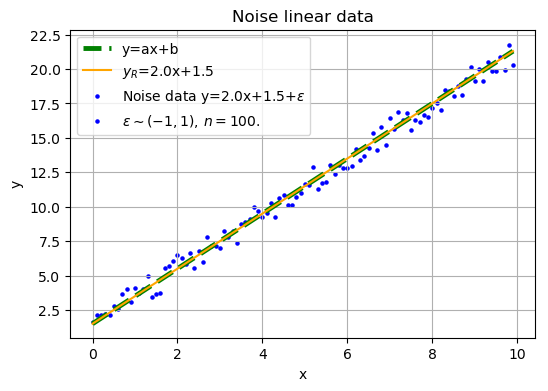

In [140]:
# displaying the title
plt.title("Noise linear data")
plt.plot(x,y, color='green',label='y=ax+b', linestyle='dashed', linewidth=3.5)
plt.scatter(x,y_e, color='blue',s=5,label='Noise data y='+str(a)+'x+'+str(b)+'+$\epsilon$')
plt.scatter([],[], color='blue',s=5,label='$\epsilon\sim(-1,1) , \, n=$'+str(n)+'.')
plt.plot(x,new_y_R, color='orange',label='$y_R$='+str(round(nt0,3))+'x+'+str(round(nt1,3)))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

The plot above shows a perfect agreement between fitted parameters and data for a uniform-noise linear model.

### Further ideas   <a class="anchor" id="fi13"></a>  

Make error plot https://medium.com/meta-design-ideas/linear-regression-by-using-gradient-descent-algorithm-your-first-step-towards-machine-learning-a9b9c0ec41b1 <br>
Make a plot showing distances between the linear model and its corresponding data point.  <br>
Make an animation plot varying parameters in terms of epoch.    <br>
Make the exemple of https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/ contido em <br>
Apply gradient descent for matrix inversion.<br>
Do the linear regression with Lasso regularization. 

In [90]:
a,b,t0,t1

(2.0, 1.5, 10.5, 100.0)

In [91]:
del(new_t0, new_t1 )

NameError: name 'new_t0' is not defined

Starting t0=  10.5  | t1= 100.0


In [93]:
new_t0[-1], new_t1[-1]

(8.394417221317993e+34, 5.612324699911802e+35)

In [ ]:
del(new_t0, new_t1 )

Starting t0=  10.5  | t1= 100.0


In [62]:
new_t0[-1], new_t1[-1]

(1.9999999999999962, 1.500000000000024)

In [ ]:
y_R = t0 * x  - t1 
theta1 = theta1- (learning_rate*(2./n)*np.sum(y-y_R))

Loading data <br>
Select model <br>
Run learning <br>
Optimization <br>
Results

In [ ]:
More references

[] https://medium.com/@amit25173/linear-regression-using-gradient-descent-1a3858ef0ca3 <br>
[] equations  https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/    

#### Appendix

https://www.delftstack.com/pt/howto/python/how-to-clear-variables-in-ipython/ <br>
Utilize %reset para limpar todas as variáveis do IPython - Requer confirmação do usuário <br>
Utilize %reset -f para apagar todas as variáveis no IPython - Sem confirmação do usuário <br>
Utilize del para limpar uma variável específica em IPython <br>
Utilizar magic('reset -sf') para limpar variáveis antes da execução do script <br>
Conclusão

In [203]:
qa= np.array([0,1,2,3,4])
qb=np.array([0,1,20,30,5])
qc=np.array([0,0.5,1,2,3])
aux = qb-qa
print("qb-qa",qb-qa)
print("aux",aux)
print("qc*aux",qc*aux)
print("qc*(qb-qa)",qc*(qb-qa))
print("qa*(qa-qb)=",np.sum(qc*aux))

qb-qa [ 0  0 18 27  1]
aux [ 0  0 18 27  1]
qc*aux [ 0.  0. 18. 54.  3.]
qc*(qb-qa) [ 0.  0. 18. 54.  3.]
qa*(qa-qb)= 75.0


In [200]:
multi1 = 0.
soma = 0.
for i in range(len(qa)):
    aux=qb[i]-qa[i]
    multi1 =  qc[i]* aux
    soma= soma + multi1
    print(i,aux,'|',qc[i],'x',aux,'=',multi1,'soma =',soma)

0 0 | 0.0 x 0 = 0.0 soma = 0.0
1 0 | 0.5 x 0 = 0.0 soma = 0.0
2 18 | 1.0 x 18 = 18.0 soma = 18.0
3 27 | 2.0 x 27 = 54.0 soma = 72.0
4 1 | 3.0 x 1 = 3.0 soma = 75.0


In [173]:
qa-qb

array([ 0,  0,  0, 27,  0])

In [174]:
print((qa*2. - qb)**2)

[0.000e+00 1.000e+00 4.000e+00 3.249e+03 1.600e+01]


In [175]:
print(np.sum((qa*2. - qb)**2))

3270.0


In [176]:
np.sum([0.000e+00, 1.000e+00, 4.000e+00, 3.249e+03, 1.600e+01])

3270.0

In [ ]:
def grad_descent1_c (X,Y,theta0,theta1,learning_rate,data_size,epoch,verbose):
    # This fuction caculates the model parameters update in order to minimize a error
    #This erro must be derivated and included in parameter update formula
    #  mi = mi - (derror /dmi)
    # X is the x data values; Y is the Y data values;
    # theta0 is ths slope parameter; theta1 the linear coeff (all related with a linear model y= t0 x+ t1) FIRST GUESS
    #learning rate is a free weight optimization step parameter (between 0 and 1.)
    # data size is the len of data
    #epoch is the n. of steps upgrading the gradient descent
    
    list_theta0 = []
    list_theta1 = []
    for i in range(epoch):
        y_R = theta0 * X  + theta1
        if verbose:
            print('before t0=',theta0,' | t1=',theta1)  
            #print('before t0=',theta0,' | t1=',theta1," | y_R=",y_R[])      
            #               error_f(y,x,t0,t1,data_size)
            print ("error=",error_f(X,Y,theta0,theta1,data_size))
        
        theta0 -= (learning_rate*(-2./n)*np.sum(X*(Y-y_R)))
        theta1 -=  (learning_rate*(-2./n)*np.sum(Y-y_R))
        
        if verbose:
            print("=========",i,"=========")
            print('after t0=',theta0,' | t1=',theta1)
            print ("np.sum=", np.sum(y-y_R),"(2./n)*np.sum((y-y_R)) = ", (2./n)*np.sum((y-y_R)),"(2./n)*np.sum(x*(y-y_R)) = ", (2./n)*np.sum(x*(y-y_R)))  
            print ("(learning_rate*(2./n)*np.sum(x*(y-y_R)))", (learning_rate*(2./n)*np.sum(x*(y-y_R))))       
            print ("error=",error_f(X,Y,theta0,theta1,data_size))

        
        list_theta0.append(theta0)
        list_theta1.append(theta1)
    return list_theta0,list_theta1        
    